<a href="https://colab.research.google.com/github/cthitch137/PHYS250/blob/main/Collin_Hitchcock_Lab02_plotting_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview

* The goal of this lab is to introduce the basic plotting and visualization functions that we will use throughout the semester.

* The main tool that we will use for plotting functions and data is matplotlib.  See https://matplotlib.org/stable/gallery/index.html for lots of example plots and code to create them.



In [92]:
# We will import the modules that we need in the first cell
# so we don't have to run this part repeatedly

import numpy as np
from matplotlib import pyplot as plt
from astropy.table import Table
# the following module is used to read in image files
from matplotlib import image
%matplotlib inline

# Warm Up - Functions

(5 points)

* Before moving on to plotting, we will do a warm up problem to practice making and using functions.


### The Modulo Operator

The modulo operator (%) returns the remainder of a division.  So if we enter:
```
10 % 2
```
we should get zero back.  Test this in the cell below, as well as

```
9 % 2
```

In [5]:
# test modulo function here by printing the output for the two lines above
82 % 2

0

Now write a function called **oddeven** that:
* takes in an integer
* prints out "that's odd..." if the number is odd
* prints out "even steven" if the number is even.
* returns a warning statement if the user enters something other than an integer.  For example:

```python
if type(n) != int:
  print('please enter an integer')
```



In [6]:
# create your function here
def oddeven(num):
  "Takes in an integer and returns whether or not the number is even or odd using an if/else statement"
  if num % 2 == 0:
    print('even steven')
  elif num % 2 == 1:
    print('thats odd')
  else:
    print('That wasnt an integer. Please try again')


In [9]:
# test your function using an odd number as input
print(oddeven(1))
# test your function using an even number as input
print(oddeven(2))
# testing for non integer
print(oddeven(3.2))

thats odd
None
even steven
None
That wasnt an integer. Please try again
None


# Reading in data from a file and plotting it

(5 points)

- Here we will use **wget** to download a sample dataset, and we will read it in using np.loadtxt.  
- NOTE: When you see an exclamation point in front of a command, we are actually calling a linux command from within colab.

- The data file contains temperature and magnitude data for a sample of stars.  Magnitude is a weird astronomy units that measures how bright the star is.  A low value of magnitude is a brighter than a higher magnitude star.  Think of it as runners in a race - the first runner is fastest.

- The plot of magnitude versus temperature is called the **Hertzsprung-Russell** diagram, named after the two astronomers who first plotted star properties in this way.  Astronomers use the Hertzsprung-Russel diagram to categorize stars into the classes that tell us something about where the star is along its evolution from birth to death.

In [10]:
!wget http://www-personal.umich.edu/~mejn/cp/data/stars.txt

--2024-01-29 19:48:58--  http://www-personal.umich.edu/~mejn/cp/data/stars.txt
Resolving www-personal.umich.edu (www-personal.umich.edu)... 141.211.243.103
Connecting to www-personal.umich.edu (www-personal.umich.edu)|141.211.243.103|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://public.websites.umich.edu/~mejn/cp/data/stars.txt [following]
--2024-01-29 19:48:58--  https://public.websites.umich.edu/~mejn/cp/data/stars.txt
Resolving public.websites.umich.edu (public.websites.umich.edu)... 141.211.243.103
Connecting to public.websites.umich.edu (public.websites.umich.edu)|141.211.243.103|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 148507 (145K) [text/plain]
Saving to: ‘stars.txt’

stars.txt           100%[===================>] 145.03K   583KB/s    in 0.2s    

2024-01-29 19:48:59 (583 KB/s) - ‘stars.txt’ saved [148507/148507]



In [11]:
# check out the contents of your current directory using
!ls

sample_data  stars.txt


In [12]:
star_data = np.loadtxt('stars.txt')
# set the first column equal to temp in Kelvin
temp = star_data[:,0]

# set the second column equal to magnitude
mag = star_data[:,1]

Text(7000, 0, 'Giants')

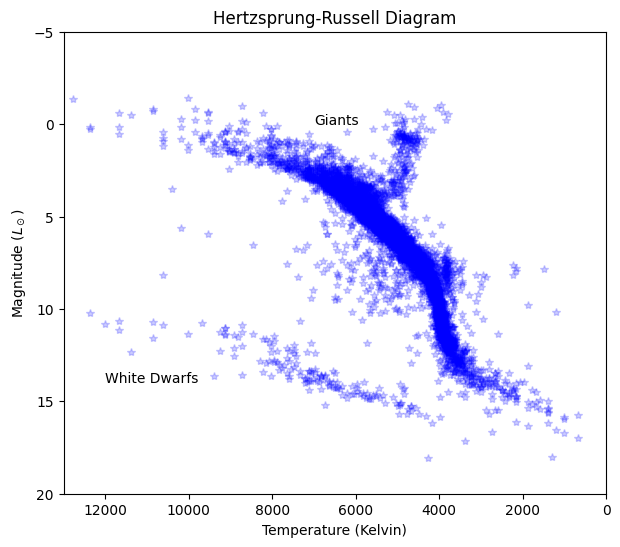

In [54]:
# open a figure
plt.figure(figsize=(7,6))

# use the plt.plot command to plot magnitude versus temperature
# plot the points using blue stars
# set alpha=.2 so you can see the points better
plt.plot(temp,mag, 'b*', alpha=0.2)

# limit the x range uto (0,13000) using plt.xlim()
plt.xlim(0,13000)

# limit the x range uto (-5,20) using plt.ylim()
plt.ylim(-5,20)

# invert the x axis so that high lumonisities are on the left
ax = plt.gca()
ax.invert_xaxis()

# invert the y axis because magnitudes are weird in that
# brighter objects have lower magnitudes
ax.invert_yaxis()

# label your x and y axis
plt.xlabel('Temperature (Kelvin)')
plt.ylabel('Magnitude ($L_\odot$)')
plt.title('Hertzsprung-Russell Diagram')

# the sequence in the lower left is white dwarfs

# add a text label to show where the white dwarfs are
# using plt.text()  (use help(plt.text) to learn how to use it.)
plt.text(12000,14,'White Dwarfs')

# the sequence around T=5000 and magnitude=0 are giants
# add a label to show where the giants are using plt.text()
plt.text(7000, 0,'Giants')

In [30]:
#help(plt.text)

Text(0.5, 1.0, 'Hertzsprung-Russell Diagram')

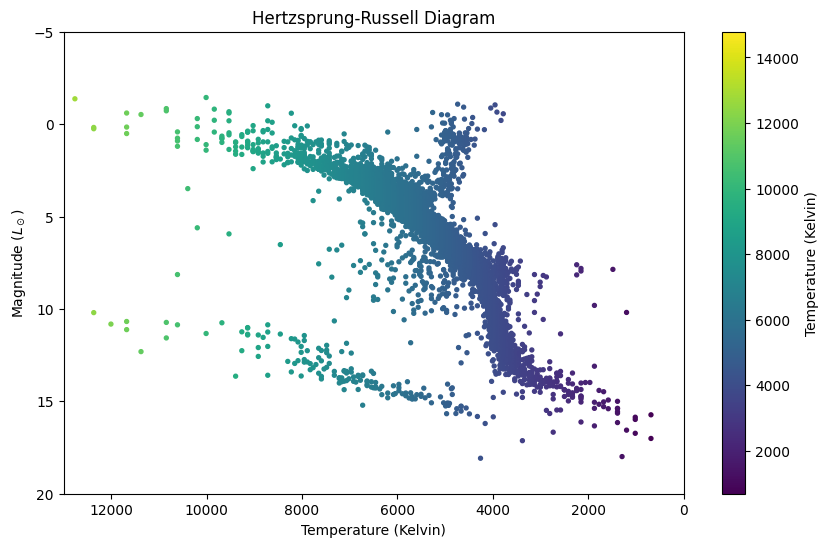

In [53]:
# plot again using the scatter plot command,
# and color code by the temperature of the star
# note that c=mycolor is how you add color to the scatter plot.
plt.figure(figsize=(10,6))
plt.scatter(temp,mag, s = 8, c=temp)
cb=plt.colorbar()
cb.set_label('Temperature (Kelvin)')

plt.xlim(0,13000)
plt.ylim(-5,20)

ax = plt.gca()
ax.invert_xaxis()
ax.invert_yaxis()

plt.xlabel('Temperature (Kelvin)')
plt.ylabel('Magnitude ($L_\odot$)')
plt.title('Hertzsprung-Russell Diagram')


# Polar Plot

(5 points)

* Sometimes it's useful to visualize data using a polar plot.
* The following example is from https://matplotlib.org/stable/gallery/pie_and_polar_charts/polar_demo.html

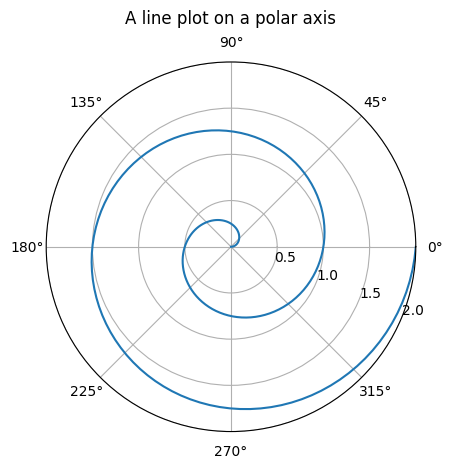

In [46]:
# create an array of radial values, r, that range from 0 to 2 with 200 steps
r = np.linspace(0,2,200)
# create an array of angles, theta, that is 2*np.pi*r
theta = 2*(np.pi)*r

# the main plotting commands are in place below
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, r)
ax.set_rmax(2)
ax.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)

ax.set_title("A line plot on a polar axis", va='bottom')
plt.show()

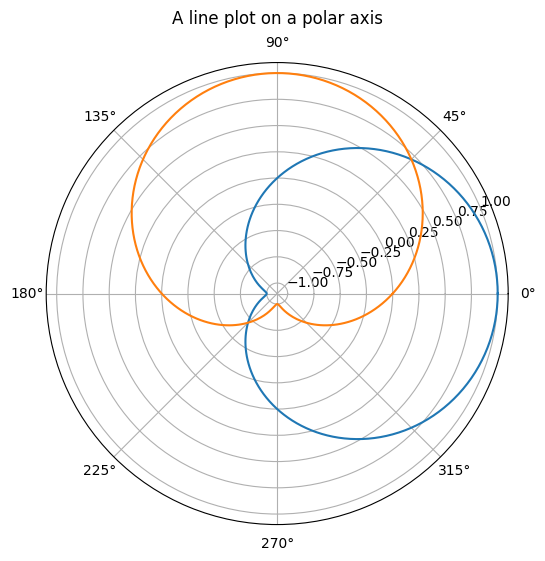

In [62]:
# make another polar plot showing sine and cosine of theta
# let theta range from zero to 2 pi, with 200 steps

theta = np.linspace(0,2*np.pi,200)
r = np.cos(theta)
r1 = np.sin(theta)

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'},figsize=(6,6))

# cos(theta)
ax.plot(theta, r)
# sin(theta)
ax.plot(theta,r1)




ax.set_title("A line plot on a polar axis", va='bottom')
plt.show()

ax.set_rticks([0.25, .5, .75,1])
ax.grid(True)


# Displaying an image

(5 points)

We will use matplotlib's image module to display a jpg image.

In [48]:
# here we are downloading an image from the web using the linux tool wget
# the exclamation point tells us that this is a linux command
!wget http://www.envisionarchitects.com/files/9615/5017/1251/Siena_Obs_3.jpg

--2024-01-29 20:07:06--  http://www.envisionarchitects.com/files/9615/5017/1251/Siena_Obs_3.jpg
Resolving www.envisionarchitects.com (www.envisionarchitects.com)... 205.134.241.102
Connecting to www.envisionarchitects.com (www.envisionarchitects.com)|205.134.241.102|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 271505 (265K) [image/jpeg]
Saving to: ‘Siena_Obs_3.jpg’

Siena_Obs_3.jpg     100%[===================>] 265.14K  1.09MB/s    in 0.2s    

2024-01-29 20:07:06 (1.09 MB/s) - ‘Siena_Obs_3.jpg’ saved [271505/271505]



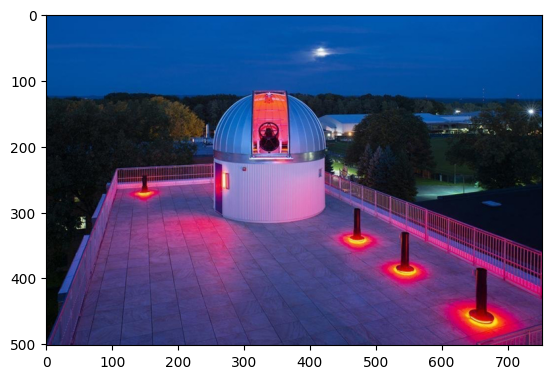

In [49]:
# we will use the image reader from matplotlib
# (there are other options - feel free to google)
# enter the image name below
myimage = image.imread("Siena_Obs_3.jpg")

plt.imshow(myimage)

### Display another image
Select another image to plot.  You can download the image from the web, or upload an image to your drive folder.  Or take a selfie!

To upload an image from your computer, type the following in a separate cell to start an interactive dialog where you can select your image.

```python
from google.colab import files
uploaded = files.upload()

In [72]:
# code to plot your second image here
!wget https://www.thesprucepets.com/thmb/Wy9Vno45XeFtos7omJ80qkZrtZc=/3760x0/GettyImages-174770333-0f52afc06a024c478fafb1280c1f491f.jpg

--2024-01-29 20:23:17--  https://www.thesprucepets.com/thmb/Wy9Vno45XeFtos7omJ80qkZrtZc=/3760x0/GettyImages-174770333-0f52afc06a024c478fafb1280c1f491f.jpg
Resolving www.thesprucepets.com (www.thesprucepets.com)... 151.101.2.137, 151.101.66.137, 151.101.130.137, ...
Connecting to www.thesprucepets.com (www.thesprucepets.com)|151.101.2.137|:443... connected.
HTTP request sent, awaiting response... 400 Bad Request
2024-01-29 20:23:18 ERROR 400: Bad Request.



In [73]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [76]:
from google.colab import files

In [88]:
uploaded = files.upload()

Saving dwag.jpg to dwag.jpg


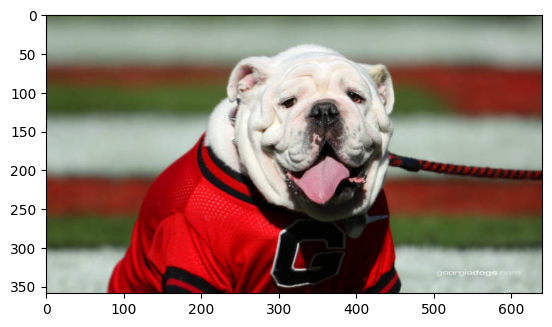

In [93]:
iimage = image.imread("dwag.jpeg")
plt.imshow(iimage)

# Fitting a Straight Line to Data (Adapted from Newman Problem 3.8)

(5 points)

* download the datafile millikan.txt from http://www-personal.umich.edu/~mejn/cp/data/millikan.txt
* This is historic data from Rober Millikan that measured the photoelectric effect.
* Read in the data using np.loadtxt
  * the first colum is the frequence $\nu$ in hertz
  * the second column is the voltage $V$ in volts.
* Fit a line to the data using np.polyfit
```python
c = np.polyfit(x,y,1)
```

* Plot the best-fit line with the data. The following should be useful:
```python
xline = np.linspace(xmin,xmax,100)
yline = np.polyval(c,xline)
```

* The physical equation that determines the best-fit line is
$$V = \frac{h}{e} \nu - \phi $$
where
  * V is the voltage of the ejected electron
  * $\nu$ is the frequency of the light that shines on the metal
  * $\phi$ is the amount of energy needed to remove the electron from the metal, also known as the work function.
  * $h$ is Planck's constant
  * $e=1.6 \times 10^{-19}$ C is the charge of the electron in Coulombs.

* From your best fit slope and intercept, determine the values of the work function and Planck's constant.



In [105]:
# enter your code here
# first create a series of comments to describe what your code will do
# then develop the code

dataset = np.loadtxt('http://www-personal.umich.edu/~mejn/cp/data/millikan.txt')
# set the first column equal to temp in Kelvin
Hertz = dataset[:,0]

# set the second column equal to magnitude
Voltage = dataset[:,1]

In [108]:
c = np.polyfit(Hertz,Voltage,1) # Getting best fit values
xline = np.linspace(np.min(Hertz),np.max(Hertz),100) #making xline using min and max values according to Hertz values
yline = np.polyval(c,xline) # making corresponding yline using best fit values and xline

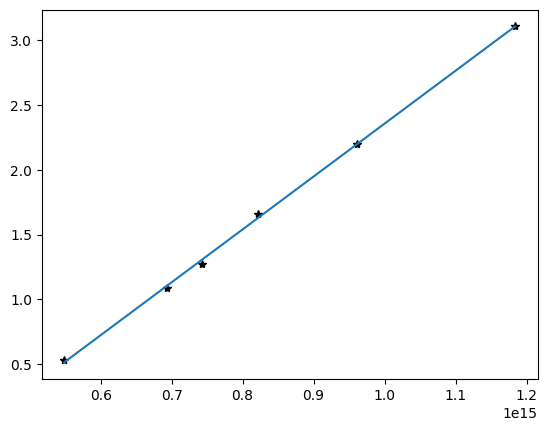

In [112]:
plt.plot(Hertz,Voltage,'k*')
plt.plot(xline,yline)

In [162]:
h = c[0] * 1.602 * (10**-19)
print(f"Planck's constant is {h} and the work function is {c[1]} according to this dataset.")

Planck's constant is 6.549340228345048e-34 and the work function is -1.7312358039813522 according to this dataset.


# Histogram of Data

(5 points)

* Histograms are useful for looking at the distribution of values for one particular quantity.
* In this problem, we will generate 100 random values that are drawn from a Gaussian distribution, and we will then plot the values in a histogram.
* We will then calculate the average and standard deviation, and show these values on the graph.

* Read through the output from help - what do you expect the mean and standard deviation to be?

In [116]:
# explore the function using help
help(plt.axvline)

Help on function axvline in module matplotlib.pyplot:

axvline(x=0, ymin=0, ymax=1, **kwargs)
    Add a vertical line across the Axes.
    
    Parameters
    ----------
    x : float, default: 0
        x position in data coordinates of the vertical line.
    
    ymin : float, default: 0
        Should be between 0 and 1, 0 being the bottom of the plot, 1 the
        top of the plot.
    
    ymax : float, default: 1
        Should be between 0 and 1, 0 being the bottom of the plot, 1 the
        top of the plot.
    
    Returns
    -------
    `~matplotlib.lines.Line2D`
    
    Other Parameters
    ----------------
    **kwargs
        Valid keyword arguments are `.Line2D` properties, except for
        'transform':
    
        Properties:
        agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
        alpha: scalar or None
        animated: bool
        anti

average value = 0.00
the STD = 1.00


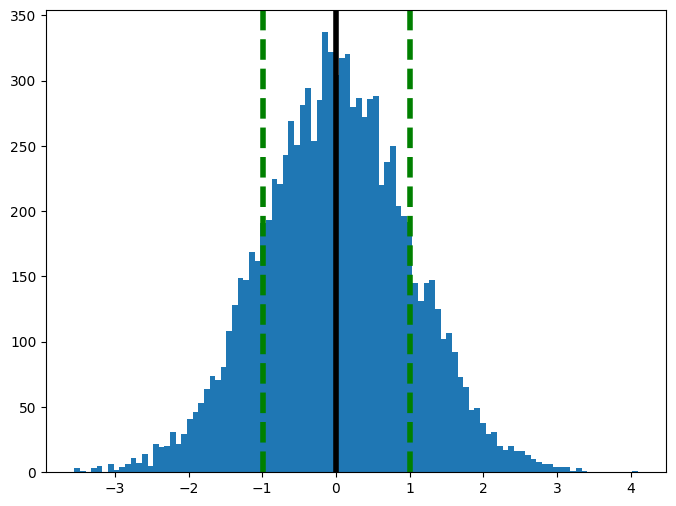

In [136]:
plt.figure(figsize=(8,6))

gauss_values = np.random.normal(size=10000)
plt.hist(gauss_values,100)
print("average value = {:.2f}".format(np.mean(gauss_values)))
print("the STD = {:.2f}".format(np.std(gauss_values)))

# add code to plot a vertical line at the average
# use plt.axvline()
plt.axvline(np.mean(gauss_values),linewidth=4, color='k')

# add code to plot dotted vertical lines at
# average + std
plt.axvline(np.mean(gauss_values) + np.std(gauss_values),linewidth=4, color='g', linestyle='--')
# average - std
plt.axvline(np.mean(gauss_values) - np.std(gauss_values),linewidth=4, color='g', linestyle='--')

# once your figure is set, try increasing the sample size
# what happens to the mean and std as the sample size increases?

# As sample size increases, it made the standard deviation increase. As for the average value it just went to zero. Though maybe 10,000,000 was too much.
# I also changed the binning to 100 and it made the average value -0.01.
#

# Multipanel Plot

(5 points)
* create a plot with 4 panel - two columns and two rows.  You can call the top plot using plt.subplot(nrow,ncol,nplot), or
```python
plt.subplot(2,2,1)
```
* plot $sin(\theta)$ vs. $\theta$ in the first panel.
* plot $cos(\theta)$ vs. $\theta$ in the second panel.
* plot $tan(\theta)$ vs. $\theta$ in the third panel.
* plot all three functions together in the fourth panel.
* use np.cos, np.sin, np.tan

(-1.0, 1.0)

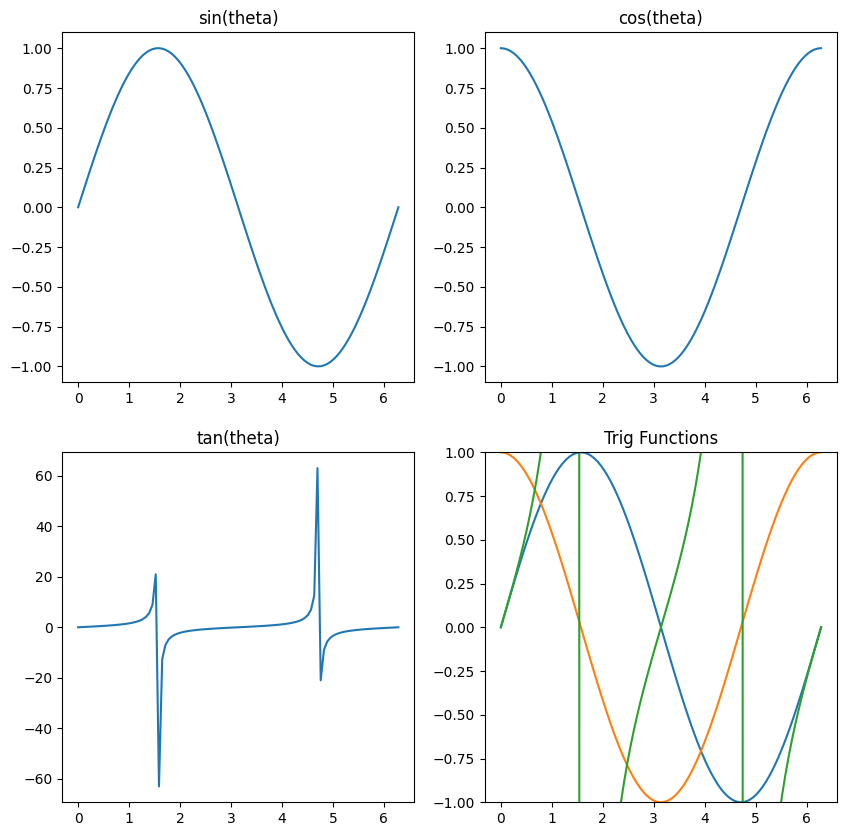

In [144]:
# Your code here
theta = np.linspace(0,2*np.pi,100)
plt.figure(figsize=(10,10))
# Sin
plt.subplot(2,2,1)
plt.plot(theta,np.sin(theta))
plt.title('sin(theta)')

# Cos
plt.subplot(2,2,2)
plt.plot(theta,np.cos(theta))
plt.title('cos(theta)')

# Tan
plt.subplot(2,2,3)
plt.plot(theta,np.tan(theta))
plt.title('tan(theta)')

# All
plt.subplot(2,2,4)
plt.plot(theta,np.sin(theta))
plt.plot(theta,np.cos(theta))
plt.plot(theta,np.tan(theta))
plt.title('Trig Functions')
plt.ylim(-1,1)

# 3D Plots

(5 points)

* Below is an example of a 3D plot, just for future reference.
* You don't need to add anything except a title that indicates some physical situation where this type of motion could arise.
*NOTE: if you run this cell on your own installation of notebook, you will be able to move the plot around to view it from different angles.

Text(0.5, 0.92, 'Coil Plot')

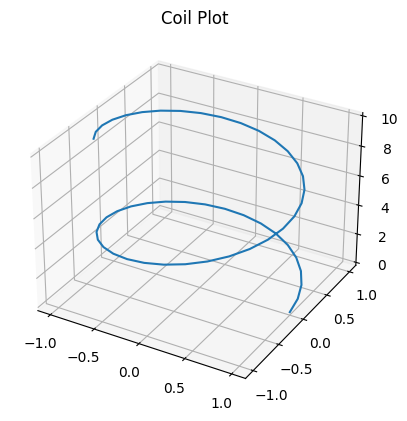

In [159]:
fig = plt.figure()

# keeping the projection = 3d
# ctreates the 3d plot
ax = plt.axes(projection = '3d')
time = np.linspace(0,10)
x = np.cos(time)
y = np.sin(time)
plt.plot(x,y,time)

# add your title here!
plt.title('Coil Plot')

# One final plot of your choice

(5 points)

* Check out the Examples and Tutorials on the [matplotlib website](https://matplotlib.org/stable/index.html).
* Select a plot that you like and replicate the code here.

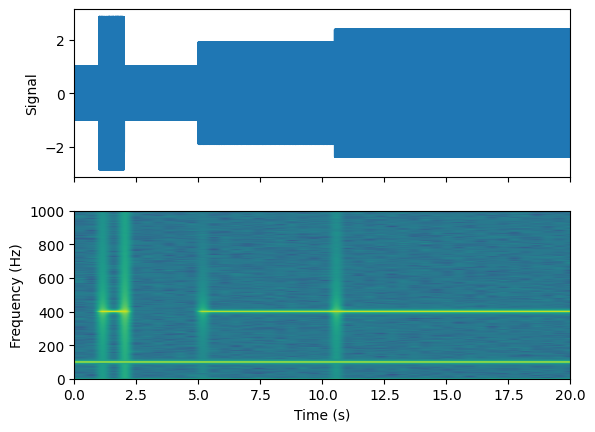

In [158]:
# Link to where I found the code
# https://matplotlib.org/stable/gallery/images_contours_and_fields/specgram_demo.html#sphx-glr-gallery-images-contours-and-fields-specgram-demo-py

np.random.seed()

dt = 0.0005
t = np.arange(0, 50, dt)
s1 = np.sin(2 * np.pi * 100 * t)
s2 = 2 * np.sin(2 * np.pi * 400 * t)
s3 = 1 * np.sin(2 * np.pi * 400 * t)
s4 = .5 * np.sin(2 * np.pi * 400 * t)

# create a transient "chirp"
s2[t <= 1] = s2[2 <= t] = 0

s3[t <= 5] = s2[8 <= t] = 0

s4[t <= 10.5] = s2[12.2 <= t] = 0


# add some noise into the mix
nse = .01 * np.random.random(size=len(t))

x = s1 + s2 + s3 + s4 + nse  # the signal
NFFT = 1024  # the length of the windowing segments
Fs = 1/dt  # the sampling frequency

fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)
ax1.plot(t, x)
ax1.set_ylabel('Signal')

Pxx, freqs, bins, im = ax2.specgram(x, NFFT=NFFT, Fs=Fs)
# The `specgram` method returns 4 objects. They are:
# - Pxx: the periodogram
# - freqs: the frequency vector
# - bins: the centers of the time bins
# - im: the .image.AxesImage instance representing the data in the plot
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Frequency (Hz)')
ax2.set_xlim(0, 20)

plt.show()



# Summarizing What Your Learning and Saving Your Work

* Save your notebook to github.
* On your wiki, create a summary page of the important points covered in this lab.
* This should be similar to the reference cheat-sheets, rather than a paragraph summary. So include code snippets and explanatory text.
